### General Imports

In [1]:
import numpy as np
import pandas as pd

### aequilibrium Imports

In [2]:
from aequilibrium.balance import Balance
from aequilibrium.dataset import DataSet
from aequilibrium.model import Model
from aequilibrium.results import Results
from aequilibrium.utils.api_wrapper import (
    get_best_results,
    train_and_evaluate,
    train_models,
)
from aequilibrium.visualize import Visualize

# Prepare mock data
## Must bring clean train and validation set into aequilibrium (no Nulls, only numerical variables

#### data can be downloaded here: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [3]:
base_df = pd.read_csv("data/kaggle_stroke_dataset.csv")

### User is responsible for pre-processing, including null-handling and removing categorical columns

In [4]:
base_df = base_df.select_dtypes(include=np.number)
base_df = base_df.dropna()

In [5]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(base_df)

In [6]:
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (31453, 7)
val shape:  (10485, 7)


In [7]:
features = ["age", "hypertension", "avg_glucose_level", "bmi"]
target = "stroke"

In [8]:
base_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,30669,3.0,0,0,95.12,18.0,0
1,30468,58.0,1,0,87.96,39.2,0
2,16523,8.0,0,0,110.89,17.6,0
3,56543,70.0,0,0,69.04,35.9,0
4,46136,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0
43396,5450,56.0,0,0,213.61,55.4,0
43397,28375,82.0,1,0,91.94,28.9,0
43398,27973,40.0,0,0,99.16,33.2,0


In [9]:
print(base_df["stroke"].sum() / len(base_df))

0.015332156993657304


***

# Use Case 1: High-level functionality

In [75]:
# must turn into aequilibrium DataSets first
train_data = DataSet(
    predictors=train[features],
    target=train[target],
)
val_data = DataSet(
    predictors=val[features],
    target=val[target],
)

In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# non-exhaustive sample of model imports that you can pass aequilibrium
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

### Use train_and_evaluate to do most of the work for you

## User needs to bring the following:
1. training data (clean)
2. test data (clean)
3. specificy your own models (but as you see, basic sklearn models work great)

In [77]:
modeling_results = train_and_evaluate(
    train_dataset=train_data,
    test_dataset=val_data,
    models=[LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()],
    metric=[
        "true_positives",
        "true_negatives",
        "false_positives",
        "false_negatives",
        "precision",
        "recall",
        "sensitivity",
        "specificity",
        "f1_score",
        "auc_pr",
    ],
    sort_metric="auc_pr",
    balance_techniques=[
        "prototype_generation",
        "random_oversampling",
        "random_undersampling",
        "smote_oversampling",
        "smote_tomek",
        "smote_enn",
        "adasyn_sample",
    ],
    random_state=42,
)

In [78]:
# function returns dataframe with different model iterations and results on the test set
# you can directly access the models, train results, and test results from here
modeling_results

,balance_technique,model,train_result,test_result,true_positives,true_negatives,false_positives,false_negatives,precision,recall,sensitivity,specificity,f1_score,auc_pr,rank
0,random_undersampling,<aequilibrium.model.Model object at 0x7f7dd1fb...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,127,7352,2951,55,0.041261,0.697802,0.697802,0.713579,0.077914,0.176900,9.0
1,smote_enn,<aequilibrium.model.Model object at 0x7f7dd3d3...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,67,8673,1630,115,0.039481,0.368132,0.368132,0.841794,0.071315,0.163985,12.0
2,prototype_generation,<aequilibrium.model.Model object at 0x7f7dd704...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,133,7234,3069,49,0.041537,0.730769,0.730769,0.702126,0.078605,0.104582,6.0
3,smote_tomek,<aequilibrium.model.Model object at 0x7f7dd3c6...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,61,8933,1370,121,0.042628,0.335165,0.335165,0.867029,0.075635,0.100377,14.0
4,smote_oversampling,<aequilibrium.model.Model object at 0x7f7dd1f5...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,61,8930,1373,121,0.042538,0.335165,0.335165,0.866738,0.075495,0.100373,15.0
5,adasyn_sample,<aequilibrium.model.Model object at 0x7f7dd3d8...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,61,8943,1360,121,0.042928,0.335165,0.335165,0.868000,0.076107,0.094122,13.0
6,prototype_generation,<aequilibrium.model.Model object at 0x7f7dd1ff...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,133,7263,3040,49,0.041916,0.730769,0.730769,0.704940,0.079285,0.082215,5.0
7,random_undersampling,<aequilibrium.model.Model object at 0x7f7dd3b2...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,137,7559,2744,45,0.047553,0.752747,0.752747,0.733670,0.089455,0.067828,3.0
8,prototype_generation,<aequilibrium.model.Model object at 0x7f7dd1e5...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,132,7689,2614,50,0.048070,0.725275,0.725275,0.746287,0.090164,0.061457,7.0
9,random_oversampling,<aequilibrium.model.Model object at 0x7f7dd6ef...,<aequilibrium.results.Results object at 0x7f7d...,<aequilibrium.results.Results object at 0x7f7d...,142,7664,2639,40,0.051061,0.780220,0.780220,0.743861,0.095849,0.058805,2.0


### With just one more step, you can get visualizations from the best model above

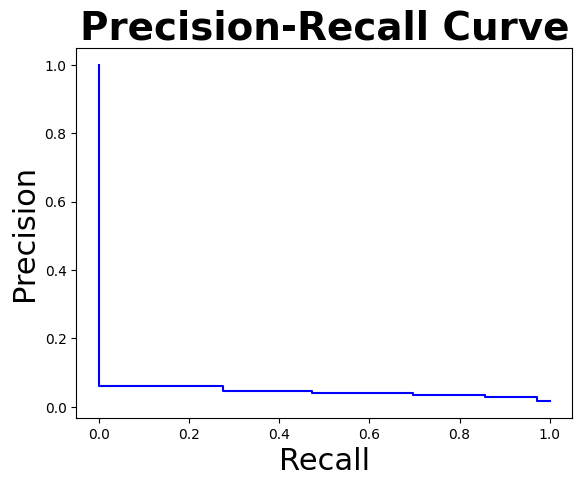

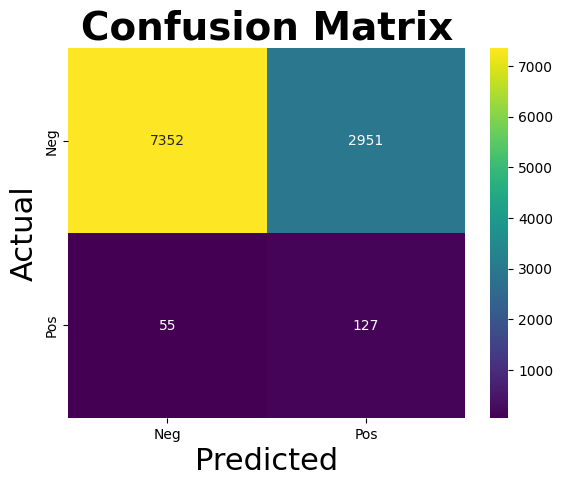

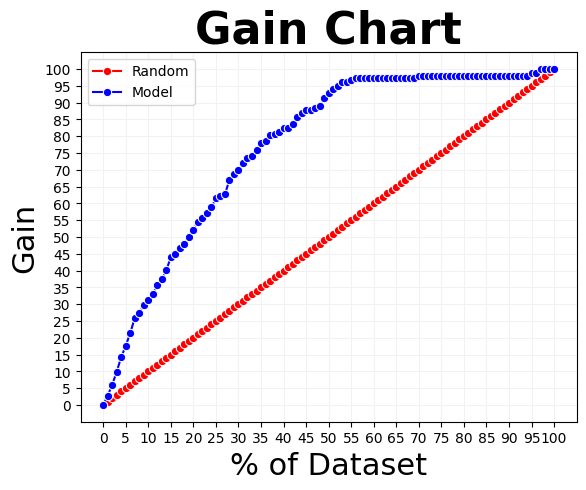

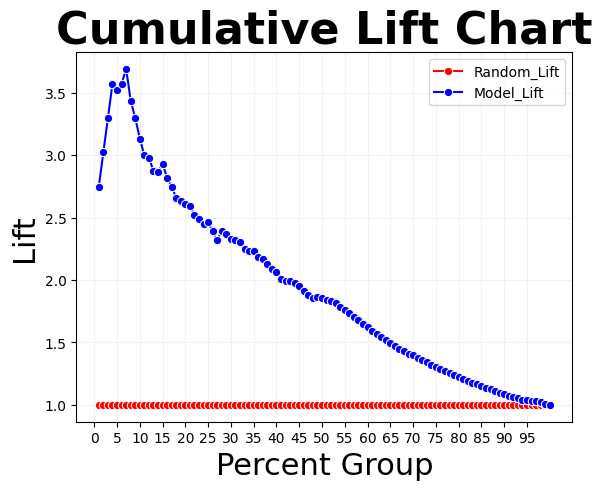

In [79]:
best_results = modeling_results["test_result"][0]
viz = Visualize(best_results, num_decimals=2)
results_df = viz.complete_evaluation()

In [80]:
results_df

,percentile,min_y_proba,max_y_proba,mean_y_proba,percentile_row_count,percentile_pos_count,percentile_perc_random_events,row_count,pos_count,perc_random_events,perc_actual_events,percentile_perc_actual_events,percent_of_population_x_100,percentile_x_100,Random_Lift,precision,Model_Lift,Percentile_Model_Lift,recall,percentile_recall
0,0.01,1.0,1.0,1.0,105,5,1.0,105,5,1.0,2.747253,2.747253,1.001431,1.0,1,0.047619,2.747253,2.743328,2.747253,2.747253
1,0.02,1.0,1.0,1.0,105,6,1.0,210,11,2.0,6.043956,3.296703,1.001431,2.0,1,0.052381,3.021978,3.291994,6.043956,3.296703
2,0.03,1.0,1.0,1.0,105,7,1.0,315,18,3.0,9.890110,3.846154,1.001431,3.0,1,0.057143,3.296703,3.840659,9.890110,3.846154
3,0.04,1.0,1.0,1.0,105,8,1.0,420,26,4.0,14.285714,4.395604,1.001431,4.0,1,0.061905,3.571429,4.389325,14.285714,4.395604
4,0.05,1.0,1.0,1.0,105,6,1.0,525,32,5.0,17.582418,3.296703,1.001431,5.0,1,0.060952,3.516484,3.291994,17.582418,3.296703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.96,0.0,0.0,0.0,105,0,1.0,10066,180,96.0,98.901099,0.000000,1.001431,96.0,1,0.017882,1.030220,0.000000,98.901099,0.000000
96,0.97,0.0,0.0,0.0,105,2,1.0,10171,182,97.0,100.000000,1.098901,1.001431,97.0,1,0.017894,1.030928,1.097331,100.000000,1.098901
97,0.98,0.0,0.0,0.0,105,0,1.0,10276,182,98.0,100.000000,0.000000,1.001431,98.0,1,0.017711,1.020408,0.000000,100.000000,0.000000
98,0.99,0.0,0.0,0.0,105,0,1.0,10381,182,99.0,100.000000,0.000000,1.001431,99.0,1,0.017532,1.010101,0.000000,100.000000,0.000000


# Use Case 2: Take existing results and evaluate

In [10]:
results_df = pd.read_csv("data/kaggle_stroke_results.csv")

In [11]:
results_df.head()

,Unnamed: 0,age,avg_glucose_level,bmi,stroke,y_pred,y_proba
0,1,58.0,87.96,39.2,0,0,0.01
1,3,70.0,69.04,35.9,0,0,0.04
2,6,52.0,77.59,17.7,0,0,0.00
3,7,75.0,243.53,27.0,0,0,0.05
4,8,32.0,77.67,32.3,0,0,0.00


In [12]:
y_true = "stroke"
y_pred = "y_pred"
y_proba = "y_proba"

In [13]:
results_class = Results(results_df[y_true], results_df[y_pred], results_df[y_proba])

In [14]:
results_viz = Visualize(results_class, num_decimals=3)

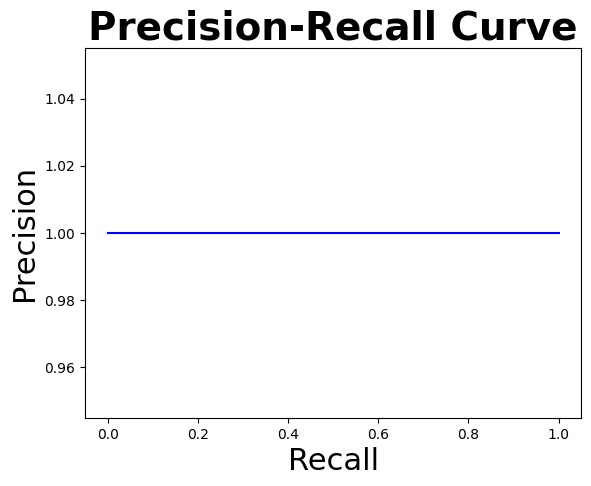

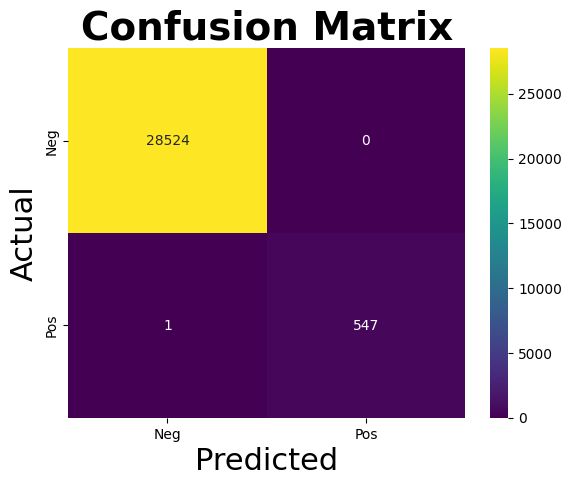

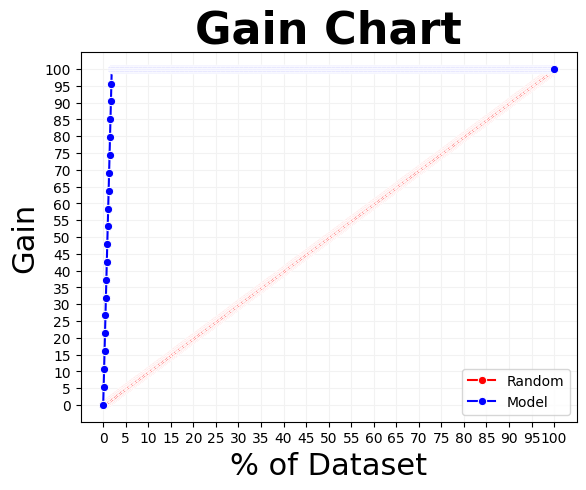

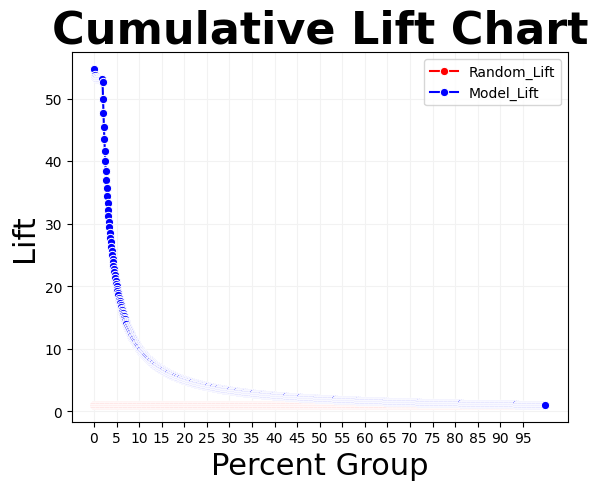

In [15]:
measure_df = results_viz.complete_evaluation(save_dir="my_plots")

In [16]:
measure_df

,percentile,min_y_proba,max_y_proba,mean_y_proba,percentile_row_count,percentile_pos_count,percentile_perc_random_events,row_count,pos_count,perc_random_events,perc_actual_events,percentile_perc_actual_events,percent_of_population_x_100,percentile_x_100,Random_Lift,precision,Model_Lift,Percentile_Model_Lift,recall,percentile_recall
0,0.001,0.73,0.81,0.756000,30,30,0.1,30,30,0.1,5.474453,5.474453,0.103192,0.1,1,1.000000,54.744526,53.051095,5.474453,5.474453
1,0.002,0.71,0.73,0.719655,29,29,0.1,59,59,0.2,10.766423,5.291971,0.099752,0.2,1,1.000000,53.832117,53.051095,10.766423,5.291971
2,0.003,0.70,0.71,0.704138,29,29,0.1,88,88,0.3,16.058394,5.291971,0.099752,0.3,1,1.000000,53.527981,53.051095,16.058394,5.291971
3,0.004,0.69,0.70,0.693793,29,29,0.1,117,117,0.4,21.350365,5.291971,0.099752,0.4,1,1.000000,53.375912,53.051095,21.350365,5.291971
4,0.005,0.68,0.69,0.685517,29,29,0.1,146,146,0.5,26.642336,5.291971,0.099752,0.5,1,1.000000,53.284672,53.051095,26.642336,5.291971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.996,0.00,0.00,0.000000,29,0,0.1,28956,548,99.6,100.000000,0.000000,0.099752,99.6,1,0.018925,1.004016,0.000000,100.000000,0.000000
996,0.997,0.00,0.00,0.000000,29,0,0.1,28985,548,99.7,100.000000,0.000000,0.099752,99.7,1,0.018906,1.003009,0.000000,100.000000,0.000000
997,0.998,0.00,0.00,0.000000,29,0,0.1,29014,548,99.8,100.000000,0.000000,0.099752,99.8,1,0.018887,1.002004,0.000000,100.000000,0.000000
998,0.999,0.00,0.00,0.000000,29,0,0.1,29043,548,99.9,100.000000,0.000000,0.099752,99.9,1,0.018869,1.001001,0.000000,100.000000,0.000000


***

# Use Case 3: Step-by-Step walk through of aequilibrium package functionality

# a. Create DataSet class for training and validation

In [17]:
train_data = DataSet(
    predictors=train[features],
    target=train[target],
)
val_data = DataSet(
    predictors=val[features],
    target=val[target],
)

### Check if train_data and val_data are balanced (they should not be)

In [18]:
train_data.is_balanced()

False

In [19]:
val_data.is_balanced()

False

# b. Balance Data 

### Create Balance instance

In [20]:
balanced_train = Balance(train_data)

In [21]:
balanced_train.dataset

DataSet(predictors=         age  hypertension  avg_glucose_level   bmi
15880  23.00             0              83.26  42.9
2070   64.00             0              82.89  29.5
32815  50.00             0             168.54  37.9
33627  55.00             0              83.26  31.3
37027  64.00             0             232.53  35.0
...      ...           ...                ...   ...
41842  37.00             0             150.88  26.3
32259   3.00             0              97.84  20.0
10207  55.00             0              87.02  26.9
20870   0.48             0             122.11  12.4
12957  81.00             0             232.96  37.6

[31453 rows x 4 columns], target=15880    0
2070     0
32815    0
33627    0
37027    0
        ..
41842    0
32259    0
10207    0
20870    0
12957    0
Name: stroke, Length: 31453, dtype: int64, target_distribution=0    30992
1      461
Name: stroke, dtype: int64, num_predictors=4, num_samples=31453, balanced=False)

### Iterate through different balancing methods

In [22]:
train_balanced_dfs = balanced_train.balance_data()

In [23]:
train_balanced_dfs["random_oversampling"]

DataSet(predictors=        age  hypertension  avg_glucose_level   bmi
0      23.0             0              83.26  42.9
1      64.0             0              82.89  29.5
2      50.0             0             168.54  37.9
3      55.0             0              83.26  31.3
4      64.0             0             232.53  35.0
...     ...           ...                ...   ...
61979  61.0             0             111.81  27.3
61980  73.0             0              81.24  23.3
61981  80.0             0             163.81  20.7
61982  77.0             1              86.70  20.1
61983  82.0             0             126.46  14.3

[61984 rows x 4 columns], target=0        0
1        0
2        0
3        0
4        0
        ..
61979    1
61980    1
61981    1
61982    1
61983    1
Name: stroke, Length: 61984, dtype: int64, target_distribution=0    30992
1    30992
Name: stroke, dtype: int64, num_predictors=4, num_samples=61984, balanced=True)

# c. Build Model 

### Can pass any model class to Model (some edge case exceptions will throw an error)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = Model(GradientBoostingClassifier())

In [25]:
train_results, val_results = gbm.fit_predict(
    train_balanced_dfs["random_oversampling"], val_data
)

# d. Explore Results Class

In [26]:
print("train results: \n")
print("F1 Score: ", train_results.get_f1_score())
print("False Negatives: ", train_results.get_false_negatives())
print("False Positives: ", train_results.get_false_positives())
print("Precision: ", train_results.get_precision())
print("Recall: ", train_results.get_recall())
print("Sensitivity: ", train_results.get_sensitivity())
print("Specificity: ", train_results.get_specificity())
print("True Negatives: ", train_results.get_true_negatives())
print("True Positives: ", train_results.get_true_positives())
print("Summary Table: ", train_results.get_summary_table())

train results: 

F1 Score:  0.84300112664048
False Negatives:  3307
False Positives:  7005
Precision:  0.7980686076679159
Recall:  0.8932950438822922
Sensitivity:  0.8932950438822922
Specificity:  0.773973928755808
True Negatives:  23987
True Positives:  27685
Summary Table:                  num_samples  min_probability  max_probability  \
bins                                                            
(0.0036, 0.19]        16506         0.004527         0.190248   
(0.19, 0.376]          7928         0.190330         0.375789   
(0.376, 0.562]         5801         0.376152         0.561621   
(0.562, 0.747]         9666         0.561770         0.747458   
(0.747, 0.933]        22083         0.747496         0.933230   

                num_positive_predictions  num_positive_actuals  
bins                                                            
(0.0036, 0.19]                         0                   129  
(0.19, 0.376]                          0                  2112  
(0.376,

In [27]:
print("Val results: \n")
print("F1 Score: ", val_results.get_f1_score())
print("False Negatives: ", val_results.get_false_negatives())
print("False Positives: ", val_results.get_false_positives())
print("Precision: ", val_results.get_precision())
print("Recall: ", val_results.get_recall())
print("Sensitivity: ", val_results.get_sensitivity())
print("Specificity: ", val_results.get_specificity())
print("True Negatives: ", val_results.get_true_negatives())
print("True Positives: ", val_results.get_true_positives())
print("Summary Table: ", val_results.get_summary_table())

Val results: 

F1 Score:  0.09447088978396193
False Negatives:  53
False Positives:  2420
Precision:  0.0506080816006277
Recall:  0.7087912087912088
Sensitivity:  0.7087912087912088
Specificity:  0.7651169562263418
True Negatives:  7883
True Positives:  129
Summary Table:                    num_samples  min_probability  max_probability  \
bins                                                              
(0.00386, 0.187]         5398         0.004769         0.186541   
(0.187, 0.369]           1912         0.187009         0.369088   
(0.369, 0.551]           1011         0.370314         0.551327   
(0.551, 0.734]           1094         0.551842         0.733241   
(0.734, 0.916]           1070         0.733722         0.915725   

                  num_positive_predictions  num_positive_actuals  
bins                                                              
(0.00386, 0.187]                         0                    14  
(0.187, 0.369]                           0             

# e. Create Visualizations

In [72]:
# num_decimals sets granularity of enrichment table
val_viz = Visualize(val_results, num_decimals=3)

### Complete evaluation shows all performance visualizations and returns enriched dataframe

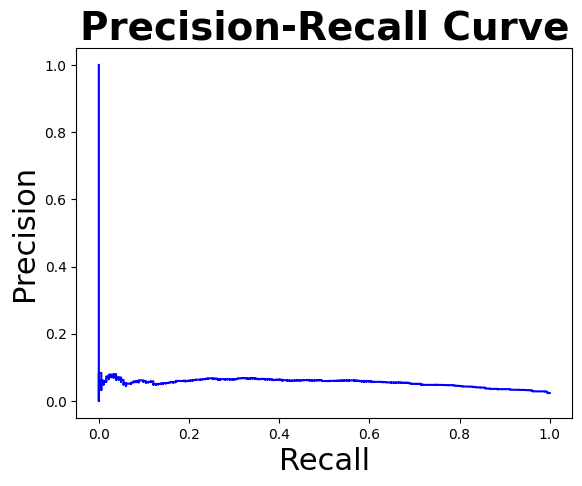

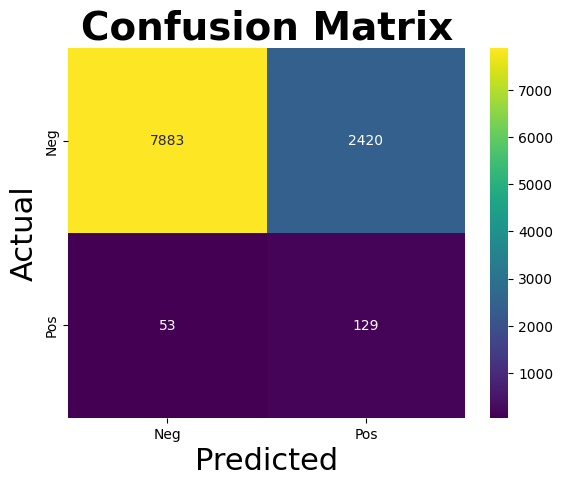

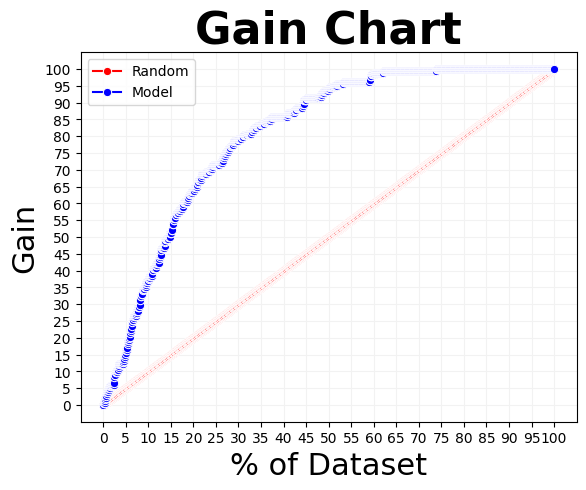

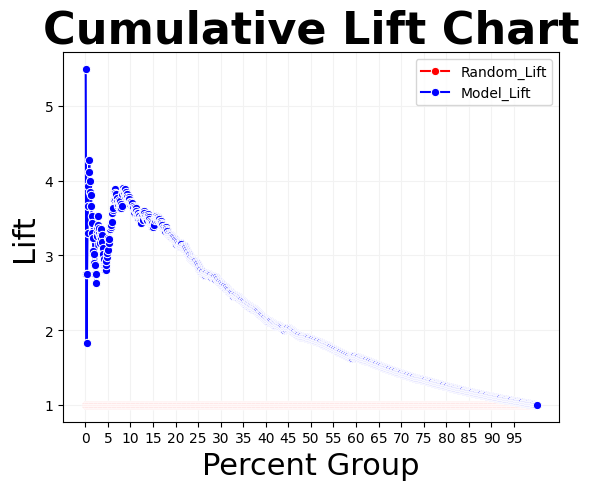

In [73]:
enriched_df = val_viz.complete_evaluation()

In [74]:
enriched_df

,percentile,min_y_proba,max_y_proba,mean_y_proba,percentile_row_count,percentile_pos_count,percentile_perc_random_events,row_count,pos_count,perc_random_events,perc_actual_events,percentile_perc_actual_events,percent_of_population_x_100,percentile_x_100,Random_Lift,precision,Model_Lift,Percentile_Model_Lift,recall,percentile_recall
0,0.001,0.914040,0.915725,0.915213,11,1,0.1,11,1,0.1,0.549451,0.549451,0.104912,0.1,1,0.090909,5.494505,5.237263,0.549451,0.549451
1,0.002,0.905730,0.914040,0.911966,10,0,0.1,21,1,0.2,0.549451,0.000000,0.095374,0.2,1,0.047619,2.747253,0.000000,0.549451,0.000000
2,0.003,0.900622,0.905106,0.902956,11,0,0.1,32,1,0.3,0.549451,0.000000,0.104912,0.3,1,0.031250,1.831502,0.000000,0.549451,0.000000
3,0.004,0.894965,0.900622,0.898000,10,1,0.1,42,2,0.4,1.098901,0.549451,0.095374,0.4,1,0.047619,2.747253,5.760989,1.098901,0.549451
4,0.005,0.894134,0.894965,0.894875,11,1,0.1,53,3,0.5,1.648352,0.549451,0.104912,0.5,1,0.056604,3.296703,5.237263,1.648352,0.549451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.996,0.007301,0.007301,0.007301,11,0,0.1,10444,182,99.6,100.000000,0.000000,0.104912,99.6,1,0.017426,1.004016,0.000000,100.000000,0.000000
996,0.997,0.007177,0.007301,0.007289,10,0,0.1,10454,182,99.7,100.000000,0.000000,0.095374,99.7,1,0.017410,1.003009,0.000000,100.000000,0.000000
997,0.998,0.004769,0.007177,0.006275,11,0,0.1,10465,182,99.8,100.000000,0.000000,0.104912,99.8,1,0.017391,1.002004,0.000000,100.000000,0.000000
998,0.999,0.004769,0.004769,0.004769,10,0,0.1,10475,182,99.9,100.000000,0.000000,0.095374,99.9,1,0.017375,1.001001,0.000000,100.000000,0.000000


***